# Excel table clustering using K-Means in Python (Machine Learning)

Author: João Nuno Carvalho
    
Date:   2017
    
License: MIT Open Source License.


## How to:

Pre-requisites:
Install the free Anaconda for Python 3.6.

Procedure:
1º Start with a table of data in a excel worksheet.
The row will be what you want to cluster, in the end this program creates a new column with the cluster ID at each row, next to the name (second column).

2º Save the excel file as a *.csv file. (Coma Separated Values)

3º At the start menu select the Anaconda prompt and then go to the directory were you have your csv file and code file and start the Jupyter notebooks by making the command “jupyter notebook”. In the file list, double click on the code file to open it.

4º In the program, change the name of the input file, to your CSV file, and change the number of clusters that you want to generate.  

5º Execute all the cells. It will generate a new CSV file, that terminates in “K_means”.

6º Open the file in Excel and apply a filter on the new column data to see the elements of the separate clusters. 

## DataSet

Zoo Data Set  (Artificial, 7 classes of animals)
UCI - Machine Learning Repository

http://archive.ics.uci.edu/ml/datasets/Zoo



In [2]:
# General imports.
import numpy as np
import pandas as pd

In [3]:
# You have to adapt this 3 variables to your specific case.
num_clusters = 7
filename = "zoo.data.csv"
name_of_first_column_to_be_ignored = 'animal name'

In [4]:
# Read the CSV file with the Pandas lib.
path_dir = ".\\"
dataframe = pd.read_csv( path_dir + filename, encoding = "cp1252", sep = ';' ) # "ISO-8859-1")
df = dataframe.copy(deep=True)
# df.head(5)[df.columns[0:4]]
df.head(5)


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
# Prepares the dataset to delete the columns that aren't used:
#  'animal name'
#
#  Replaces the 'X' by 1.0 and the NAN for 0.0 making something like hot encoding.

if name_of_first_column_to_be_ignored in df.columns:
    df = df.drop(name_of_first_column_to_be_ignored, 1)

#df = df.replace(to_replace="X", value=1.0)
#df = df.fillna(0.0)   # Fill the NAN (Not a Num)
df.head(5)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
# Apply the K-Means Clustering algoritms.
from sklearn.cluster import KMeans

#num_clusters = 7

km = KMeans(n_clusters=num_clusters, random_state=1)
new = df._get_numeric_data()
km.fit(new)
predict=km.predict(new)
df_kmeans = df.copy(deep=True)
df_kmeans['Cluster KMeans'] = pd.Series(predict, index=df_kmeans.index)
df_kmeans.head(20)





,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,Cluster KMeans
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,3
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4,3
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,3
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1,1


In [7]:
# Saving to kmeans CSV file.

# Gets the original data frame and adds to it one column in the end with the id of the cluster.

df_kmeans_orig = dataframe.copy(deep=True)
df_kmeans_orig['Cluster KMeans'] = pd.Series(predict, index=df_kmeans.index)

# Because we would like to have the column in the begining of the table, in the
# second position to facilitates comparisions.
# We are going to alter the order of the columns with a neat trick!
cols = df_kmeans_orig.columns.tolist()
cols = cols[0:1] + [cols[-1]] + cols[1:-2]
df_kmeans_orig = df_kmeans_orig[cols]


df_kmeans_orig = df_kmeans_orig.fillna("")           # assigns df to a new dataframe

filename_kmenas = filename[0:-4] + "_kmeans_" + str(num_clusters) + ".csv"
path_kmeans = path_dir + filename_kmenas
df_kmeans_orig.to_csv(path_or_buf = path_kmeans, sep = ";")
print("The file was generated!")    

The file was generated!


In [8]:
df_kmeans_orig.head(20)


,animal name,Cluster KMeans,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
5,buffalo,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
6,calf,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
7,carp,3,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
8,catfish,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
9,cavy,1,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0


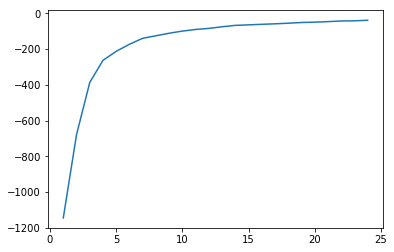

In [9]:
# Implementation of the Elbow method for KMeans.
# This method discover ina "scientific" way the best number of cluster to specify to the KMeans algorithm.

# from sklearn.cluster import KMeans

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

Ks = range(1, 25)
km = [KMeans(n_clusters=i, random_state=1) for i in Ks]
my_matrix = df._get_numeric_data()
score = [km[i].fit(my_matrix).score(my_matrix) for i in range(len(km))]

plt.plot(Ks, score)
plt.show()

After looking at the graph 7 groups look correct.
